In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
import sklearn
from subprocess import check_output
#print(check_output(["ls", "."]).decode("utf8"))
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import requests
from sklearn.model_selection import KFold

def load_dataset(save=True):
    """
    This fuction is meant to be exported so this is why here download part repeats itself.
    """
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
    r = requests.get(url, allow_redirects=True)
    open('wdbc.data', 'wb').write(r.content)
    df = pd.read_csv("wdbc.data", header=None, na_values="?", names=["id", "diagnosis", "radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean", "compactness_mean", "concavity_mean", "concave_points_mean", "symmetry_mean", "fractal_dimensionmean", "radius_se", "texture_se", "perimeter_se", "area_se", "smoothness_se", "compactness_se", "concavity_se", "concave_points_se", "symmetry_se", "gractal_dimensions_se", "radius_worst", "texture_worst", "perimeter_worst", "area_worst", "smoothness_worst", "compactness_worst", "concavity_worst", "concave_points_worst", "symmetry_worst", "fractal_dimensions_worst", "Unnamed: 32"])
    #df['diagnosis'].values[df['diagnosis'].values == "M"] = 1
    #df['diagnosis'].values[df['diagnosis'].values == "B"] = 0
    #df.dropna(inplace=True)
    if save:
        df.to_csv("wdbc.csv", index=False)

    return df

if __name__ == "__main__":
    load_dataset(True)


In [ ]:
data = load_dataset(save = True)

In [ ]:
data.head()

id diagnosis  ...  fractal_dimensions_worst  Unnamed: 32
0    842302         M  ...                   0.11890          NaN
1    842517         M  ...                   0.08902          NaN
2  84300903         M  ...                   0.08758          NaN
3  84348301         M  ...                   0.17300          NaN
4  84358402         M  ...                   0.07678          NaN

[5 rows x 33 columns]

In [ ]:
col = data.columns
print(col)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimensionmean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'gractal_dimensions_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimensions_worst', 'Unnamed: 32'],
      dtype='object')


In [ ]:
y = data.diagnosis
list_ = ['Unnamed: 32', 'id', 'diagnosis']
x = data.drop(list_, axis = 1)
x.head

<bound method NDFrame.head of      radius_mean  texture_mean  ...  symmetry_worst  fractal_dimensions_worst
0          17.99         10.38  ...          0.4601                   0.11890
1          20.57         17.77  ...          0.2750                   0.08902
2          19.69         21.25  ...          0.3613                   0.08758
3          11.42         20.38  ...          0.6638                   0.17300
4          20.29         14.34  ...          0.2364                   0.07678
..           ...           ...  ...             ...                       ...
564        21.56         22.39  ...          0.2060                   0.07115
565        20.13         28.25  ...          0.2572                   0.06637
566        16.60         28.08  ...          0.2218                   0.07820
567        20.60         29.33  ...          0.4087                   0.12400
568         7.76         24.54  ...          0.2871                   0.07039

[569 rows x 30 columns]>

Number of Benign:  357
Number of Malignant:  212


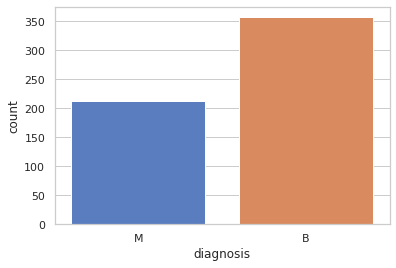

In [ ]:
ax = sns.countplot(y, label = 'Count')
B, M = y.value_counts()
print('Number of Benign: ', B)
print('Number of Malignant: ', M)

In [ ]:
x.describe()

radius_mean  texture_mean  ...  symmetry_worst  fractal_dimensions_worst
count   569.000000    569.000000  ...      569.000000                569.000000
mean     14.127292     19.289649  ...        0.290076                  0.083946
std       3.524049      4.301036  ...        0.061867                  0.018061
min       6.981000      9.710000  ...        0.156500                  0.055040
25%      11.700000     16.170000  ...        0.250400                  0.071460
50%      13.370000     18.840000  ...        0.282200                  0.080040
75%      15.780000     21.800000  ...        0.317900                  0.092080
max      28.110000     39.280000  ...        0.663800                  0.207500

[8 rows x 30 columns]

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

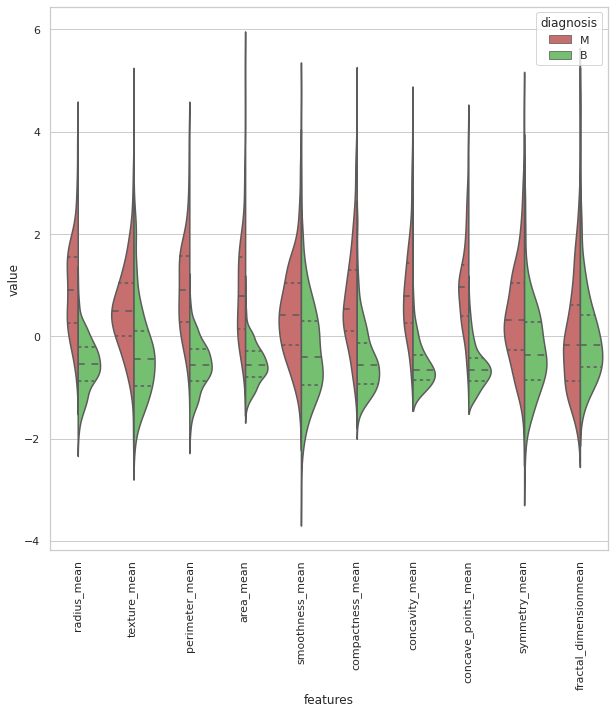

In [ ]:
# first 10 features
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())
# standarization
data = pd.concat([y, data_n_2.iloc[:,0:10]], axis = 1)
data = pd.melt(data, id_vars = 'diagnosis', var_name = 'features', value_name = 'value')
plt.figure(figsize=(10,10))
my_pal = {"M" : "r", "B": "g"}
sns.violinplot(x = 'features', y = 'value', hue = 'diagnosis', data = data, split = True, inner = 'quart', palette = my_pal)
plt.xticks(rotation = 90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

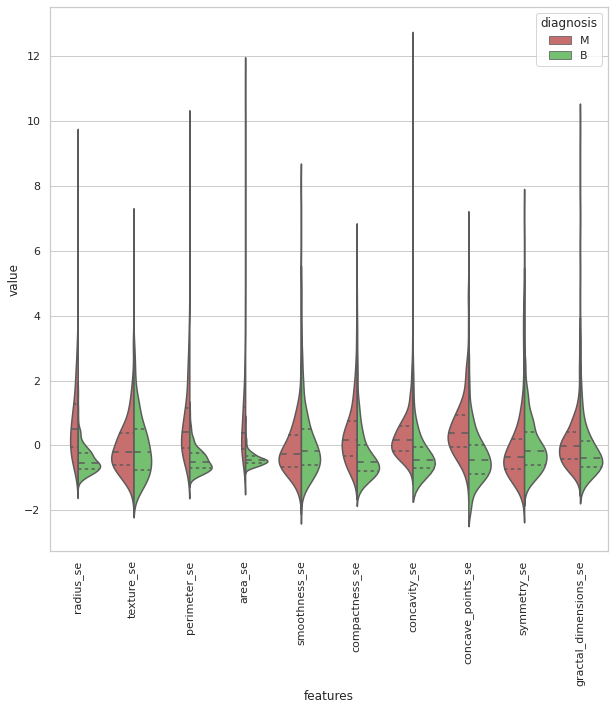

In [ ]:
# second 10 features
data = pd.concat([y,data_n_2.iloc[:,10:20]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart", palette = my_pal)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

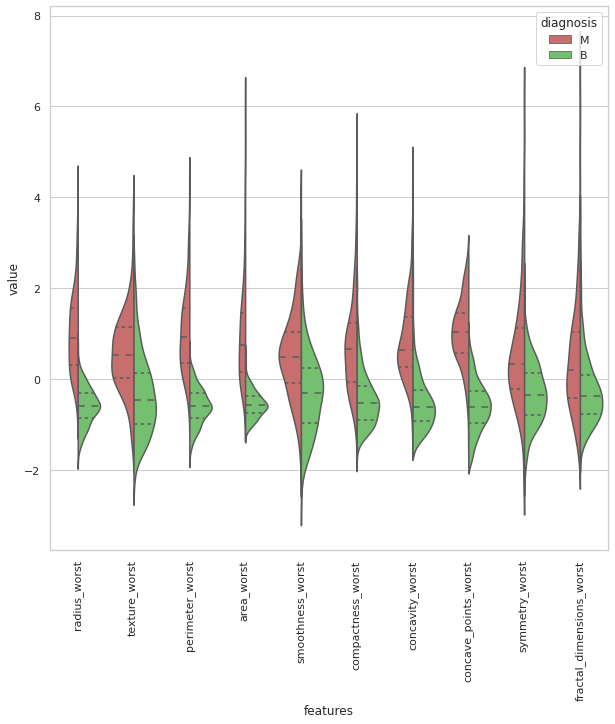

In [ ]:
# last 10 features
data = pd.concat([y,data_n_2.iloc[:,20:31]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart", palette = my_pal)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

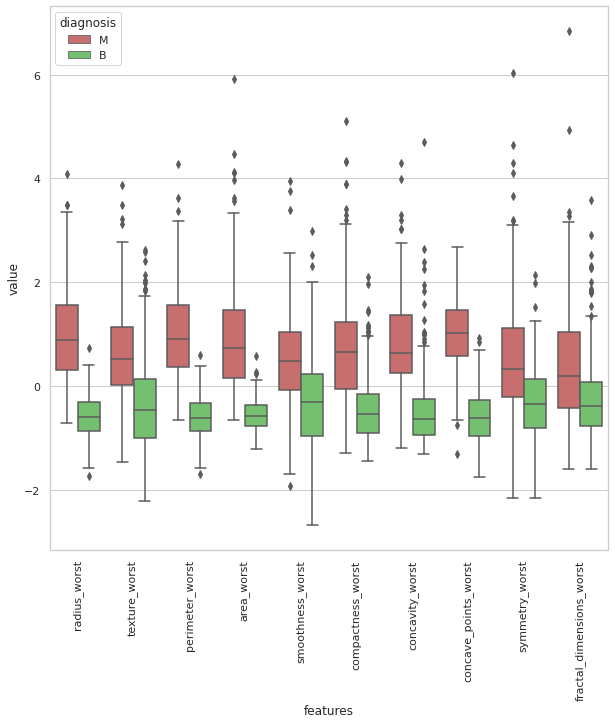

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="diagnosis", data=data, palette = my_pal)
plt.xticks(rotation=90)

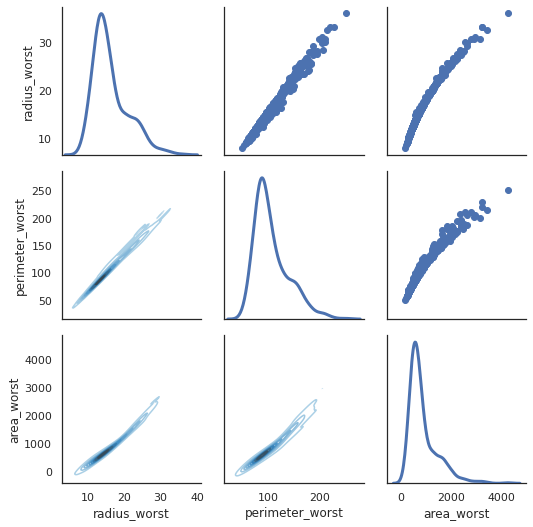

In [ ]:
sns.set(style="white")
df = x.loc[:,['radius_worst','perimeter_worst','area_worst']]
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

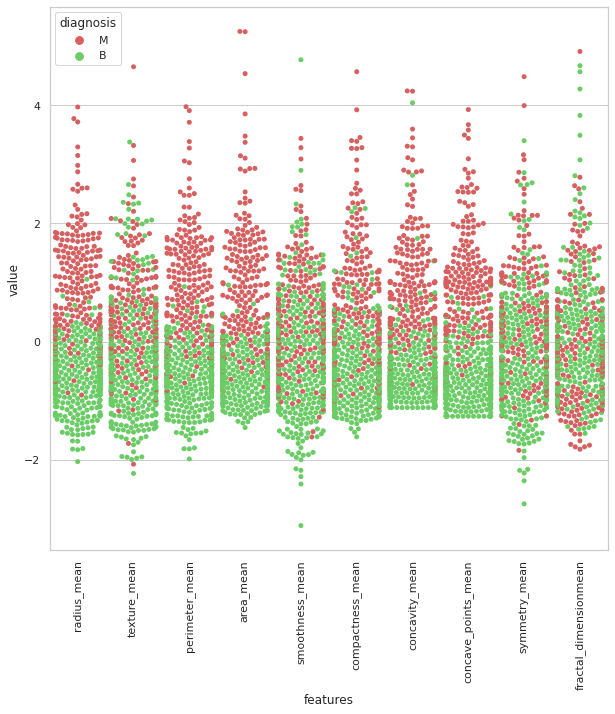

In [ ]:
sns.set(style="whitegrid", palette="muted")
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std()) # standardization
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
tic = time.time()
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data, palette = my_pal)

plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

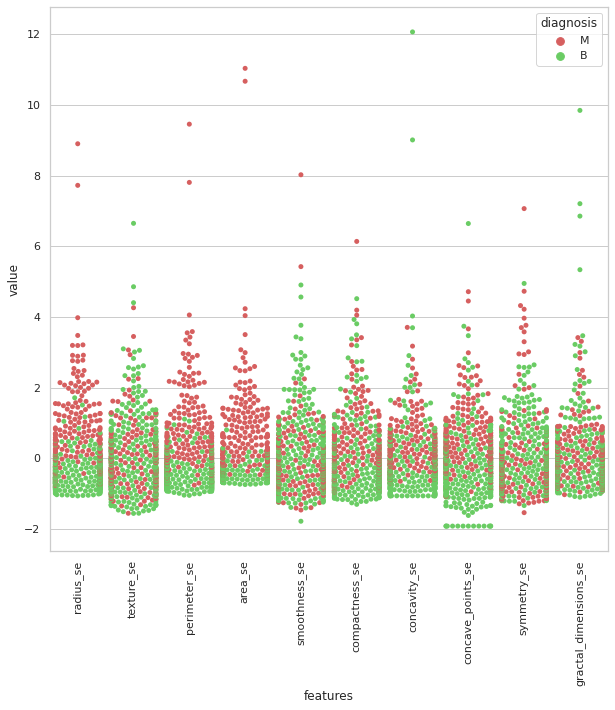

In [ ]:
data = pd.concat([y,data_n_2.iloc[:,10:20]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data, palette = my_pal)
plt.xticks(rotation=90)

swarm plot time:  14.579024076461792  s


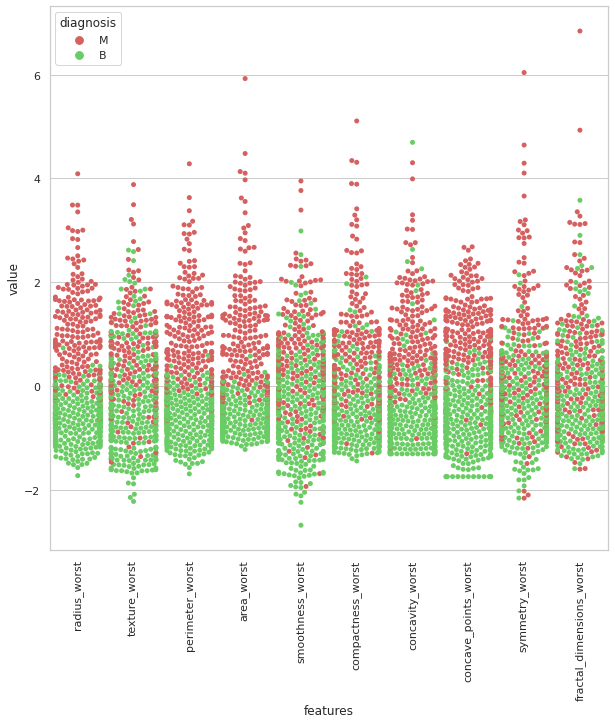

In [ ]:
data = pd.concat([y,data_n_2.iloc[:,20:31]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data, palette = my_pal)
toc = time.time()
plt.xticks(rotation=90)
print("swarm plot time: ", toc-tic ," s")

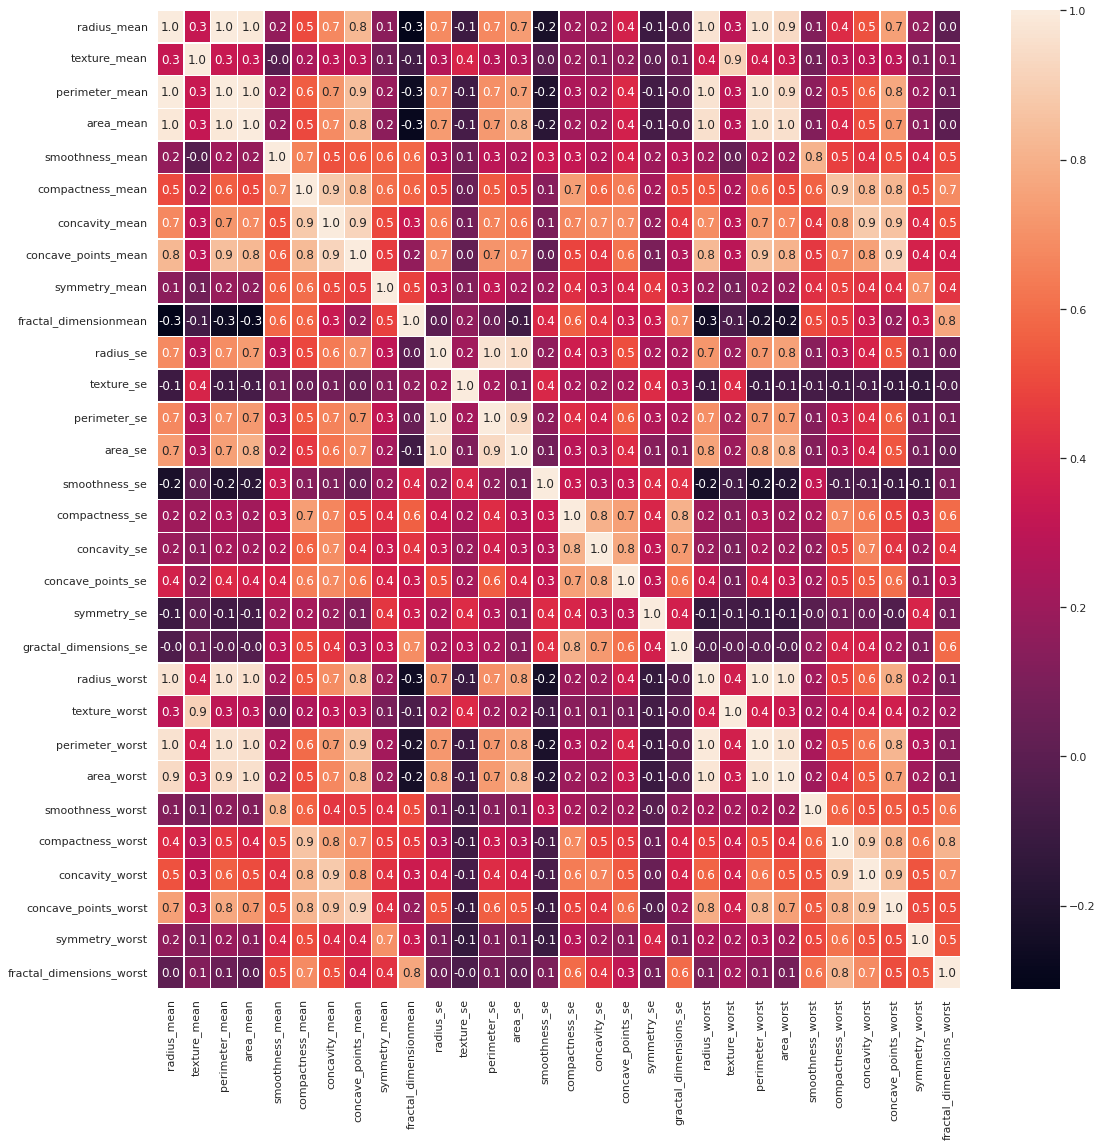

In [ ]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [ ]:
drop_list1 = ['perimeter_mean','radius_mean','compactness_mean','concave_points_mean','radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave_points_worst','compactness_se','concave_points_se','texture_worst','area_worst']
x_1 = x.drop(drop_list1,axis = 1) 
x_1.head()

texture_mean  area_mean  ...  symmetry_worst  fractal_dimensions_worst
0         10.38     1001.0  ...          0.4601                   0.11890
1         17.77     1326.0  ...          0.2750                   0.08902
2         21.25     1203.0  ...          0.3613                   0.08758
3         20.38      386.1  ...          0.6638                   0.17300
4         14.34     1297.0  ...          0.2364                   0.07678

[5 rows x 16 columns]

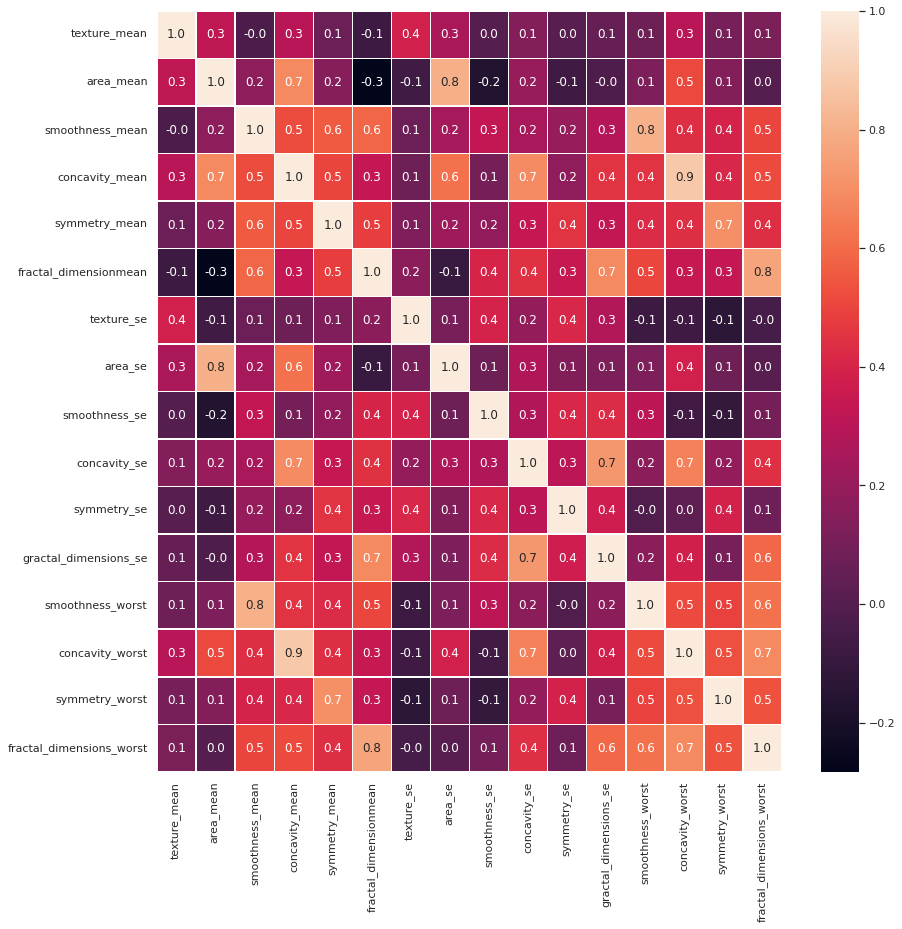

In [ ]:
#correlation map after drop
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(x_1.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

Accuracy for n_estimators 100 is:  0.9532163742690059
Accuracy for n_estimators 150 is:  0.9473684210526315
Accuracy for n_estimators 200 is:  0.9473684210526315
Accuracy for n_estimators 250 is:  0.9532163742690059
Accuracy for n_estimators 300 is:  0.9532163742690059
Accuracy for n_estimators 350 is:  0.9532163742690059
Accuracy for n_estimators 400 is:  0.9532163742690059
Accuracy for n_estimators 450 is:  0.9532163742690059
Accuracy for n_estimators 500 is:  0.9532163742690059
Accuracy for n_estimators 550 is:  0.9532163742690059


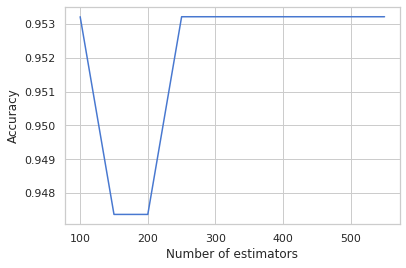

In [ ]:
# default Random Forest Classifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(x_1, y, test_size=0.3, random_state=43)

#random forest classifier with n_estimators = 100 (default)
clf_rf_100 = RandomForestClassifier(random_state=43)      
clr_rf_100 = clf_rf_100.fit(x_train,y_train)

#n_estimators = 150
clf_rf_150 = RandomForestClassifier(random_state=43, n_estimators = 150)      
clr_rf_150 = clf_rf_150.fit(x_train,y_train)

#n_estimators = 200
clf_rf_200 = RandomForestClassifier(random_state=43, n_estimators = 200)      
clr_rf_200 = clf_rf_200.fit(x_train,y_train)

#n_estimators = 250
clf_rf_250 = RandomForestClassifier(random_state=43, n_estimators = 250)      
clr_rf_250 = clf_rf_250.fit(x_train,y_train)

#n_estimators = 300
clf_rf_300 = RandomForestClassifier(random_state=43, n_estimators = 300)      
clr_rf_300 = clf_rf_300.fit(x_train,y_train)

#n_estimators = 350
clf_rf_350 = RandomForestClassifier(random_state=43, n_estimators = 350)      
clr_rf_350 = clf_rf_350.fit(x_train,y_train)

#n_estimators = 400
clf_rf_400 = RandomForestClassifier(random_state=43, n_estimators = 400)      
clr_rf_400 = clf_rf_400.fit(x_train,y_train)

#n_estimators = 450
clf_rf_450 = RandomForestClassifier(random_state=43, n_estimators = 450)      
clr_rf_450 = clf_rf_450.fit(x_train,y_train)

#n_estimators = 500
clf_rf_500 = RandomForestClassifier(random_state=43, n_estimators = 500)      
clr_rf_500 = clf_rf_500.fit(x_train,y_train)

#n_estimators = 550
clf_rf_550 = RandomForestClassifier(random_state=43, n_estimators = 550)      
clr_rf_550 = clf_rf_550.fit(x_train,y_train)

ac_100 = accuracy_score(y_test,clf_rf_100.predict(x_test))
ac_150 = accuracy_score(y_test,clf_rf_150.predict(x_test))
ac_200 = accuracy_score(y_test,clf_rf_200.predict(x_test))
ac_250 = accuracy_score(y_test,clf_rf_250.predict(x_test))
ac_300 = accuracy_score(y_test,clf_rf_300.predict(x_test))
ac_350 = accuracy_score(y_test,clf_rf_350.predict(x_test))
ac_400 = accuracy_score(y_test,clf_rf_400.predict(x_test))
ac_450 = accuracy_score(y_test,clf_rf_450.predict(x_test))
ac_500 = accuracy_score(y_test,clf_rf_500.predict(x_test))
ac_550 = accuracy_score(y_test,clf_rf_550.predict(x_test))
print('Accuracy for n_estimators 100 is: ', ac_100)
print('Accuracy for n_estimators 150 is: ', ac_150)
print('Accuracy for n_estimators 200 is: ', ac_200)
print('Accuracy for n_estimators 250 is: ', ac_250)
print('Accuracy for n_estimators 300 is: ', ac_300)
print('Accuracy for n_estimators 350 is: ', ac_350)
print('Accuracy for n_estimators 400 is: ', ac_400)
print('Accuracy for n_estimators 450 is: ', ac_450)
print('Accuracy for n_estimators 500 is: ', ac_500)
print('Accuracy for n_estimators 550 is: ', ac_550)

#cm = confusion_matrix(y_test,clf_rf.predict(x_test))
#sns.heatmap(cm,annot=True,fmt="d")

import matplotlib.pyplot as plt
plt.figure()
plt.xlabel("Number of estimators")
plt.ylabel("Accuracy")
plt.plot([100,150,200,250,300,350,400,450,500,550], [ac_100,ac_150,ac_200,ac_250,ac_300,ac_350,ac_400,ac_450,ac_500,ac_550])
plt.show()

In [ ]:
# univariate feature selection and random forest classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# find best scored 5 features
select_feature = SelectKBest(chi2, k=5).fit(x_train, y_train)

In [ ]:
print('Score list:', select_feature.scores_)
print('Feature list:', x_train.columns)

Score list: [7.37696944e+01 3.78760429e+04 1.22010881e-01 1.55368524e+01
 2.01142845e-01 1.49546284e-04 5.17511931e-04 6.60153975e+03
 1.27843548e-03 1.12665690e+00 4.03300477e-05 1.32616047e-02
 3.20970057e-01 3.16775493e+01 1.02737788e+00 2.05574948e-01]
Feature list: Index(['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
       'symmetry_mean', 'fractal_dimensionmean', 'texture_se', 'area_se',
       'smoothness_se', 'concavity_se', 'symmetry_se', 'gractal_dimensions_se',
       'smoothness_worst', 'concavity_worst', 'symmetry_worst',
       'fractal_dimensions_worst'],
      dtype='object')


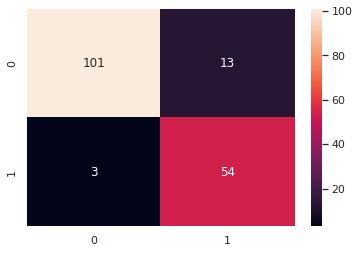

Accuracy is:  0.9064327485380117
Precision: 0.916093
Recall: 0.906433
F1 score: 0.908060
Cohens kappa: 0.798319
Specificity: 0.885965
Sensitivity: 0.947368


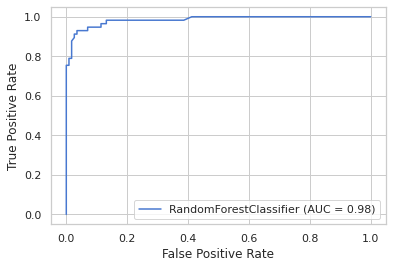

In [ ]:
x_train_2 = select_feature.transform(x_train)
x_test_2 = select_feature.transform(x_test)
#random forest classifier with n_estimators=10 (default)
print("Random forest without feature selection")
clf_rf_2 = RandomForestClassifier()      
clr_rf_2 = clf_rf_2.fit(x_train_2,y_train)
classes = clf_rf_2.predict(x_test_2)
probabilities = clf_rf_2.predict_proba(x_test_2)
prob = probabilities[:, 0]
cm_2 = confusion_matrix(y_test, classes)
sns.heatmap(cm_2,annot=True,fmt="d")
plt.show()
ac_2 = accuracy_score(y_test,clf_rf_2.predict(x_test_2))
print('Accuracy is: ',ac_2)
precision = sklearn.metrics.precision_score(y_test,classes,average='weighted', pos_label='M')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = sklearn.metrics.recall_score(y_test,classes,average='weighted', pos_label='M')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test,classes,average='weighted', pos_label='M')
print('F1 score: %f' % f1)
kappa = sklearn.metrics.cohen_kappa_score(y_test,classes)
print('Cohens kappa: %f' % kappa)
tn, fp, fn, tp = confusion_matrix(y_test, classes).ravel()
specificity = tn / (tn+fp)
print('Specificity: %f' % specificity)
sensitivity = tp / (tp+fn)
print('Sensitivity: %f' % sensitivity)
sklearn.metrics.plot_roc_curve(clf_rf_2, x_test_2, y_test) 
plt.show()


In [ ]:
# recursive feature elimination (RFE) with random forest
from sklearn.feature_selection import RFE
# Create the RFE object and rank each pixel
clf_rf_3 = RandomForestClassifier()      
rfe = RFE(estimator=clf_rf_3, n_features_to_select=5, step=1)
rfe = rfe.fit(x_train, y_train)

In [ ]:
print('Chosen best 5 feature by rfe:', x_train.columns[rfe.support_])

Chosen best 5 feature by rfe: Index(['texture_mean', 'area_mean', 'concavity_mean', 'area_se',
       'concavity_worst'],
      dtype='object')


In [ ]:
# Recursive feature elimination with cross validation and random forest classification
from sklearn.feature_selection import RFECV

# The "accuracy" scoring is proportional to the number of correct classifications
clf_rf_4 = RandomForestClassifier() 
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(x_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', x_train.columns[rfecv.support_])

Optimal number of features : 11
Best features : Index(['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
       'area_se', 'concavity_se', 'gractal_dimensions_se', 'smoothness_worst',
       'concavity_worst', 'symmetry_worst', 'fractal_dimensions_worst'],
      dtype='object')


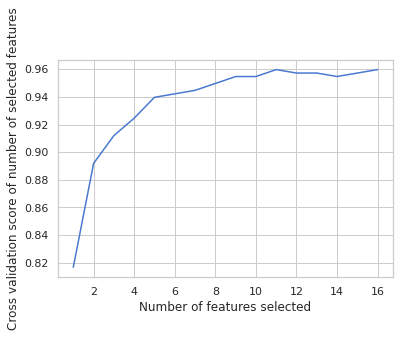

In [ ]:
# Plot number of features VS. cross-validation scores
import matplotlib.pyplot as plt
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

Random Forest with feature selection
Accuracy is:  0.9532163742690059
Precision: 0.953894
Recall: 0.953216
F1 score: 0.953413
Cohens kappa: 0.895652
Specificity: 0.956140
Sensitivity: 0.947368


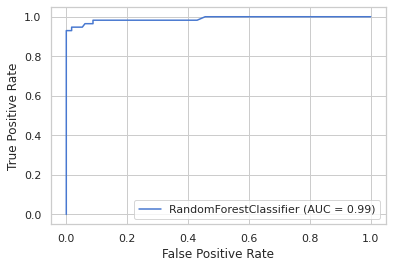

Feature ranking:
1. feature 1 (0.195543)
2. feature 3 (0.178731)
3. feature 13 (0.173746)
4. feature 7 (0.154376)
5. feature 12 (0.056990)
6. feature 0 (0.049617)
7. feature 9 (0.038093)
8. feature 14 (0.031588)
9. feature 15 (0.026590)
10. feature 2 (0.019932)
11. feature 5 (0.019103)
12. feature 8 (0.015665)
13. feature 4 (0.011691)
14. feature 10 (0.010932)
15. feature 11 (0.008871)
16. feature 6 (0.008528)


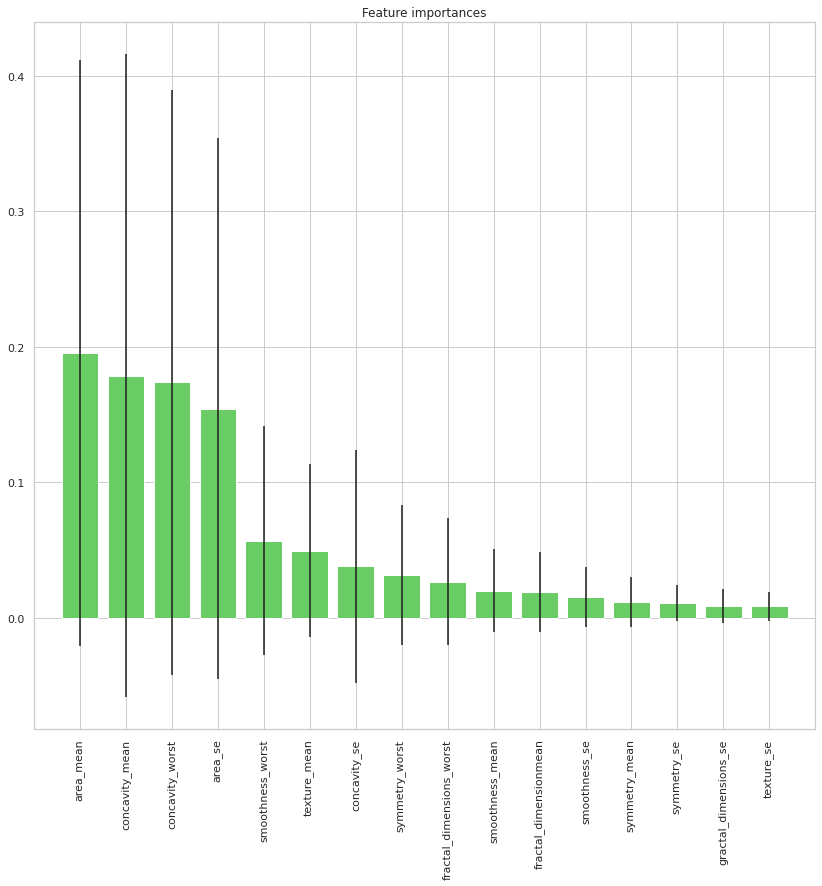

In [ ]:
# tree based feature selection and random forest classification
print("Random Forest with feature selection")
clf_rf_5 = RandomForestClassifier()      
clr_rf_5 = clf_rf_5.fit(x_train,y_train)
clr_rf_5 = clf_rf_5.fit(x_train,y_train)
classes = clf_rf_5.predict(x_test)
probabilities = clf_rf_5.predict_proba(x_test)
importances = clr_rf_5.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf_5.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

ac_5= accuracy_score(y_test,clf_rf_5.predict(x_test))
print('Accuracy is: ',ac_5)
precision = sklearn.metrics.precision_score(y_test,classes,average='weighted', pos_label='M')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = sklearn.metrics.recall_score(y_test,classes,average='weighted', pos_label='M')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test,classes,average='weighted', pos_label='M')
print('F1 score: %f' % f1)
kappa = sklearn.metrics.cohen_kappa_score(y_test,classes)
print('Cohens kappa: %f' % kappa)
tn, fp, fn, tp = confusion_matrix(y_test, classes).ravel()
specificity = tn / (tn+fp)
print('Specificity: %f' % specificity)
sensitivity = tp / (tp+fn)
print('Sensitivity: %f' % sensitivity)
sklearn.metrics.plot_roc_curve(clf_rf_5, x_test, y_test) 
plt.show()

# Print the feature ranking
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

#Plot the feature importances of the forest

plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), x_train.columns[indices],rotation=90)
plt.xlim([-1, x_train.shape[1]])
plt.show()